In [2]:
import pandas as pd
import numpy as np

In [194]:
# read data only from Premier League
df_bet = pd.read_csv("premier_league_season_data.csv")

/Users/anacuza/anaconda3/envs/iX_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [195]:
#read in only the unique Premier League data
df_uniq = pd.read_csv("unique_premier_league_season_data.csv")

In [196]:
df_bet.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1, inplace = True)
df_bet.head()

,_id,match,user,score,updatedAt,createdAt,points_x,competition,teams.home,teams.away,...,profile.club.name,friends,followedBy,follows,bet_result,result,country,autoPilot,date_createdAt,date_updatedAt
0,22275FXXRLdDxXmFJ,PDM8EjWJqZPZezZQj,TLei4cSni3yWunoLJ,"{""home"":2,""away"":2}",2018-08-29 00:11:54.428000+00:00,2018-08-29 00:11:54.428000+00:00,0,omDPBWsJQjQKHYiQD,4bi7hpuK4SFexMqBH,AXMdntDFga4JxuAdM,...,Benfica,0.0,NaN,5.0,Draw,Home Win,PT,NaN,2018-08-29,2018-08-29
1,222bs9wvReQ3rDLqT,NztjF8fC2mW7SZzhL,7QGaE7RXB987BcF7Z,"{""home"":3,""away"":1}",2018-08-11 13:40:14.004000+00:00,2018-08-11 13:40:14.004000+00:00,0,omDPBWsJQjQKHYiQD,o9asevLEsznuDPX6d,B8EQQdquvN9TuMp99,...,Porto,0.0,0.0,0.0,Home Win,Draw,PT,NaN,2018-08-11,2018-08-11
2,222vuXWadfc2MFNBe,5bgCh99AtL2NYsYMq,Z9jAv6qgp3N6FwR5n,"{""home"":2,""away"":1}",2018-08-10 21:27:17.852000+00:00,2018-08-10 21:27:17.852000+00:00,0,omDPBWsJQjQKHYiQD,BiheeNsZwbaXYQq6p,kakbp32Jte8epkKq3,...,Arsenal,0.0,NaN,0.0,Home Win,Away Win,GB,NaN,2018-08-10,2018-08-10
3,222zGK4dcafibDXMH,dSgfwnFSEybwxMyHR,RHbktkhMyQjR7n5MF,"{""home"":1,""away"":1}",2019-01-07 20:57:15.199000+00:00,2019-01-07 20:57:15.199000+00:00,1,omDPBWsJQjQKHYiQD,TDcYR9bF89v2cYJFH,NLPNTndx9xGEpAbtE,...,Porto,0.0,NaN,0.0,Draw,Draw,PT,False,2019-01-07,2019-01-07
4,222zMgFiHT2qMpBAh,SEPjbv76hfgn4GfxD,DA3pnkKL9RYH2v8LK,"{""home"":3,""away"":1}",2019-01-15 23:48:46.800000+00:00,2019-01-15 23:48:46.800000+00:00,1,omDPBWsJQjQKHYiQD,y3fgAe68qa2DbgY2D,vvMHrMNsxnbkiFM9e,...,S.L Benfica,16.0,3.0,0.0,Home Win,Home Win,PT,False,2019-01-15,2019-01-15


In [197]:
#get the home and away bets in separate columns
scores = df_bet["score"].str.replace("[^0-9]", "")
df_bet["bet.home"] = [s[0] for s in scores]
df_bet["bet.away"] = [s[1] for s in scores]
df_bet["bet.home"] = df_bet["bet.home"].astype(int)
df_bet["bet.away"] = df_bet["bet.away"].astype(int)

In [198]:
import matplotlib.pyplot as plt

In [ ]:
#find coefficients for line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


# Correlation between bets and actual scores

## Mode of bets

best fit line:
y = 1.75 + -0.12x


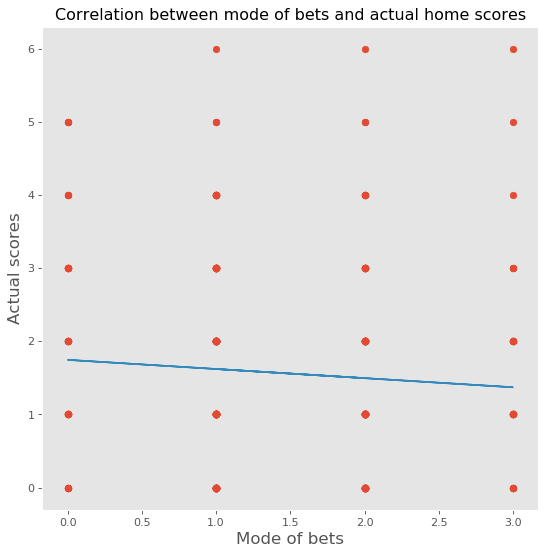

Correlation between mode of bets and actual score at home: -0.07583277097569467


In [216]:
#check correlation between actual scores and bets
#MODE
from scipy.stats import mode
# 380 mode bets
bets_home_MODE = df_bet.groupby(["home_team", "away_team"])['bet.home'].apply(lambda x: x.mode()).tolist()
bets_away_MODE = df_bet.groupby(["home_team", "away_team"])['bet.away'].apply(lambda x: x.mode()).tolist()

#check correlation between bets for home and bets for away
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(8, 8), dpi=80)
a, b = best_fit(bets_home_MODE, df_uniq["score.home"])
yfit = [a + b * x for x in bets_home_MODE]
plt.plot(bets_home_MODE, yfit, 'C1')
plt.grid()
plt.xlabel("Mode of bets", fontsize = 15)
plt.ylabel("Actual scores", fontsize = 15)
plt.title("Correlation between mode of bets and actual home scores")
plt.scatter(bets_home_MODE, df_uniq["score.home"])

plt.show()
print("Correlation between mode of bets and actual score at home:", np.corrcoef(np.array(bets_home_MODE).astype(np.float), df_uniq["score.home"])[0][1])

#no correlations for mode

## Median of bets

best fit line:
y = 1.68 + -0.07x


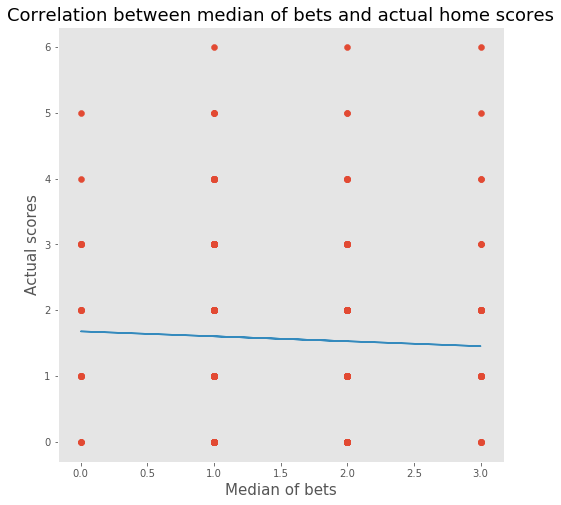

Correlation between median of bets and actual score at home: -0.045135852490790926


In [217]:
#check correlation between actual scores and bets
#MEDIAN
# 380 mean bets
bets_home_MEDIAN = df_bet.groupby(["home_team", "away_team"])['bet.home'].median().tolist()
bets_away_MEDIAN = df_bet.groupby(["home_team", "away_team"])['bet.away'].median().tolist()

#check correlation between bets for home and bets for away
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
a, b = best_fit(bets_home_MEDIAN, df_uniq["score.home"])
yfit = [a + b * x for x in bets_home_MEDIAN]
plt.plot(bets_home_MEDIAN, yfit, 'C1')
plt.grid()
plt.scatter(bets_home_MEDIAN, df_uniq["score.home"])
plt.xlabel("Median of bets", fontsize = 15)
plt.ylabel("Actual scores", fontsize = 15)
plt.title("Correlation between median of bets and actual home scores", fontsize = 18)
plt.show()
print("Correlation between median of bets and actual score at home:", np.corrcoef(np.array(bets_home_MEDIAN).astype(np.float), df_uniq["score.home"])[0][1])

#no correlations for median

## Mean of bets

best fit line:
y = 1.70 + -0.09x


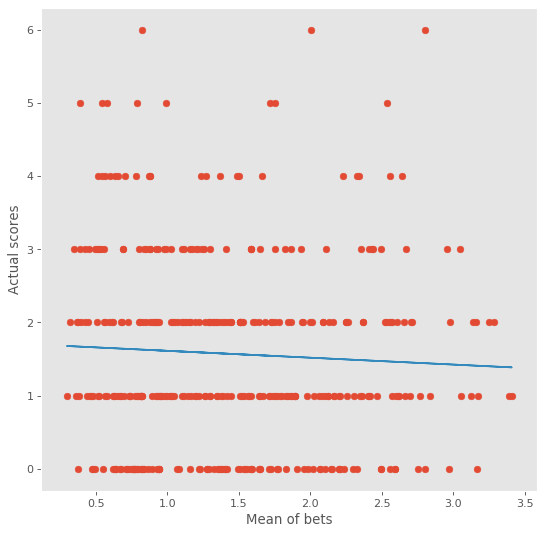

Correlation between mean of bets and actual score at home: -0.052349848707275624


In [218]:
#check correlation between actual scores and bets
#MEAN
# 380 mode bets
bets_home_MEAN = df_bet.groupby(["home_team", "away_team"])['bet.home'].mean().tolist()
bets_away_MEDIAN = df_bet.groupby(["home_team", "away_team"])['bet.away'].mean().tolist()

#check correlation between bets for home and bets for away
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(8, 8), dpi=80)
a, b = best_fit(bets_home_MEAN, df_uniq["score.home"])
yfit = [a + b * x for x in bets_home_MEAN]
plt.plot(bets_home_MEAN, yfit, 'C1')
plt.grid()
plt.scatter(bets_home_MEAN, df_uniq["score.home"])
plt.xlabel("Mean of bets")
plt.ylabel("Actual scores")
plt.show()
np.corrcoef(np.array(bets_home_MEAN).astype(np.float), df_uniq["score.home"])
print("Correlation between mean of bets and actual score at home:", np.corrcoef(np.array(bets_home_MEAN).astype(np.float), df_uniq["score.home"])[0][1])


#no correlations for median

# Predicting scores using bets

## Using Mean

In [219]:
#MODEL WITH MEAN BETS

df_bet['bet.home'] = df_bet['bet.home'].astype(int)
df_bet['bet.away'] = df_bet['bet.away'].astype(int)

#sort values by match
df_bet.sort_values("match", inplace = True)

#only get the mean for matches
bets_mean = df_bet.groupby(["match"])[['bet.home', 'bet.away']].mean().reset_index().sort_values("match")

#remove rows with duplicate matches
df_bet.drop_duplicates(subset='match', inplace = True)
df_bet.reset_index(inplace = True)

#replace bets with mean of bets
df_bet["bet.mean.home"] = bets_mean["bet.home"]
df_bet["bet.mean.away"] = bets_mean["bet.away"]

In [220]:
#create model using bets ~ goals = actual score
model_data_mean = pd.concat([df_bet[['home_team','away_team','bet.mean.home', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','bet.mean.home':'mean_bet', 'score.home': 'goals'}),
           df_bet[['away_team','home_team','bet.mean.away', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','bet.mean.away':'mean_bet', 'score.away': 'goals'})])

In [221]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [222]:
print(760*0.7)

532.0


In [223]:
poisson_model_mean_bets = smf.glm(formula="goals ~ home + team + opponent + mean_bet", data=model_data_mean[:532], 
                        family=sm.families.Poisson()).fit()
poisson_model_mean_bets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  532
Model:                            GLM   Df Residuals:                      491
Model Family:                 Poisson   Df Model:                           40
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -760.12
Date:                Mon, 29 Jul 2019   Deviance:                       513.00
Time:                        15:24:47   Pearson chi2:                     436.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.2009      0.333      3.606      0.000       0.548       1.854
team[T.Arsenal]                         0.8813      0.303      2.913      0.004       0.288       1.474
team[T.Brighton & Hove Albion]         -0.6247      0.267     -2.335      0.020      -1.149      -0.100
team[T.Burnley]                        -0.1808      0.233     -0.776      0.438      -0.637       0.276
team[T.Cardiff City]                   -0.6245      0.270     -2.316      0.021      -1.153      -0.096
team[T.Chelsea]                         0.6710      0.320      2.096      0.036       0.044       1.298
team[T.Crystal Palace]                 -0.2185      0.232     -0.943      0.346      -0.673       0.236
team[T.Everton]                         0.3116      0.241      1.293      0.196      -0.161       0.784
team[T.Fulham]                         -0.4307      0.261     -1.648      0.099      -0.943       0.082
team[T.Huddersfield Town]              -1.2401      0.323     -3.835      0.000      -1.874      -0.606
team[T.Leicester City]                  0.0686      0.245      0.281      0.779      -0.411       0.548
team[T.Liverpool]                       1.2595      0.377      3.340      0.001       0.520       1.999
team[T.Manchester City]                 1.4595      0.431      3.385      0.001       0.614       2.305
team[T.Manchester United]               0.5456      0.309      1.767      0.077      -0.060       1.151
team[T.Newcastle United]               -0.3344      0.244     -1.371      0.170      -0.812       0.144
team[T.Southampton]                    -0.0733      0.228     -0.321      0.748      -0.520       0.374
team[T.Tottenham Hotspur]               0.8560      0.319      2.683      0.007       0.231       1.481
team[T.Watford]                         0.1214      0.218      0.558      0.577      -0.305       0.548
team[T.West Ham United]                 0.2479      0.221      1.120      0.263      -0.186       0.682
team[T.Wolverhampton Wanderers]         0.0594      0.247      0.240      0.810      -0.425       0.544
opponent[T.Arsenal]                    -0.6271      0.240     -2.614      0.009      -1.097      -0.157
opponent[T.Brighton & Hove Albion]     -0.3472      0.204     -1.705      0.088      -0.746       0.052
opponent[T.Burnley]                    -0.0899      0.195     -0.462      0.644      -0.471       0.292
opponent[T.Cardiff City]               -0.0505      0.207     -0.244      0.807      -0.456       0.355
opponent[T.Chelsea]                    -0.9454      0.275     -3.443      0.001      -1.484      -0.407
opponent[T.Crystal Palace]             -0.3428      0.211     -1.624      0.104      -0.757       0.071
opponent[T.Everton]                    -0.5009      0.219     -2.28

In [224]:
predictions = poisson_model_mean_bets.predict(model_data_mean[532:][['home', 'team', 'opponent', 'mean_bet']])

In [225]:
#create a dataframe storing actual score and predictions
model_data_predictions = model_data_mean[532:].copy()
model_data_predictions.reset_index(inplace = True)
model_data_predictions.drop("index", axis = 1, inplace = True)
predictions = pd.Series(predictions)
predictions.reset_index(inplace = True, drop = True)
model_data_predictions["predictions"] = predictions

best fit line:
y = 1.08 + 0.20x


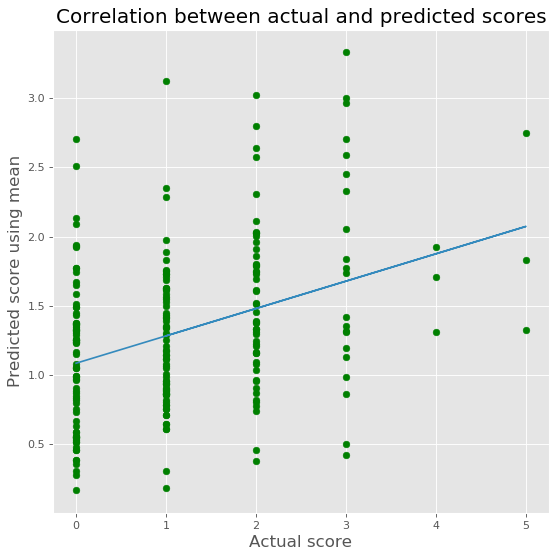

Correlation between predicted and actual scores using mean: 0.3660


In [254]:
X = model_data_predictions.goals
y = model_data_predictions.predictions

%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X, y, c = "green")

# solution
a, b = best_fit(X,y)

yfit = [a + b * x for x in X]
plt.plot(X, yfit, 'C1')

plt.xlabel("Actual score",fontsize=15)
plt.ylabel("Predicted score using mean",fontsize=15)
plt.title("Correlation between actual and predicted scores", fontsize=18)
plt.show()

#get correlation value
print("Correlation between predicted and actual scores using mean:", "{0:.4f}".format(np.corrcoef(X,y)[0][1]))

## Using Median

In [227]:
#MODEL WITH MEDIAN BETS
df_bet['bet.home'] = df_bet['bet.home'].astype(int)
df_bet['bet.away'] = df_bet['bet.away'].astype(int)

#sort values by match
df_bet.sort_values("match", inplace = True)

#only get the mean for matches
bets_median = df_bet.groupby(["match"])[['bet.home', 'bet.away']].median().reset_index().sort_values("match")

#remove rows with duplicate matches
df_bet.drop_duplicates(subset='match', inplace = True)
df_bet.reset_index(inplace = True)

#replace bets with mean of bets
df_bet["bet.median.home"] = bets_median["bet.home"]
df_bet["bet.median.away"] = bets_median["bet.away"]

#create model
model_data_median = pd.concat([df_bet[['home_team','away_team','bet.median.home', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','bet.median.home':'median_bet', 'score.home': 'goals'}),
           df_bet[['away_team','home_team','bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','bet.median.away':'median_bet', 'score.away': 'goals'})])

In [263]:
model_data_median[model_data_median.team == "Fulham"]

,team,opponent,median_bet,goals,home
27,Fulham,Crystal Palace,1,0.0,1
47,Fulham,Chelsea,0,1.0,1
70,Fulham,Huddersfield Town,2,1.0,1
77,Fulham,Arsenal,0,1.0,1
101,Fulham,Manchester City,1,0.0,1
134,Fulham,Tottenham Hotspur,1,1.0,1
144,Fulham,Everton,0,2.0,1
175,Fulham,Watford,2,1.0,1
182,Fulham,Leicester City,0,1.0,1
188,Fulham,Manchester United,1,0.0,1


In [231]:
poisson_model_median_bets = smf.glm(formula="goals ~ home + team + opponent + median_bet", data=model_data_median[:532], 
                        family=sm.families.Poisson()).fit()
poisson_model_median_bets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  532
Model:                            GLM   Df Residuals:                      491
Model Family:                 Poisson   Df Model:                           40
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -761.76
Date:                Mon, 29 Jul 2019   Deviance:                       516.27
Time:                        15:27:32   Pearson chi2:                     435.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.7098      0.223      3.185      0.001       0.273       1.147
team[T.Arsenal]                         0.4447      0.211      2.112      0.035       0.032       0.858
team[T.Brighton & Hove Albion]         -0.5012      0.261     -1.923      0.055      -1.012       0.010
team[T.Burnley]                        -0.0742      0.226     -0.328      0.743      -0.517       0.369
team[T.Cardiff City]                   -0.4250      0.251     -1.694      0.090      -0.917       0.067
team[T.Chelsea]                         0.2189      0.222      0.986      0.324      -0.216       0.654
team[T.Crystal Palace]                 -0.2035      0.232     -0.878      0.380      -0.658       0.251
team[T.Everton]                         0.1090      0.220      0.496      0.620      -0.322       0.540
team[T.Fulham]                         -0.2951      0.254     -1.162      0.245      -0.793       0.202
team[T.Huddersfield Town]              -1.0000      0.302     -3.313      0.001      -1.592      -0.408
team[T.Leicester City]                 -0.0689      0.233     -0.295      0.768      -0.526       0.388
team[T.Liverpool]                       0.6355      0.211      3.015      0.003       0.222       1.049
team[T.Manchester City]                 0.6967      0.212      3.293      0.001       0.282       1.111
team[T.Manchester United]               0.1228      0.231      0.532      0.594      -0.329       0.575
team[T.Newcastle United]               -0.2732      0.242     -1.128      0.260      -0.748       0.202
team[T.Southampton]                    -0.0344      0.227     -0.152      0.879      -0.480       0.411
team[T.Tottenham Hotspur]               0.3757      0.212      1.775      0.076      -0.039       0.791
team[T.Watford]                         0.0241      0.213      0.113      0.910      -0.394       0.442
team[T.West Ham United]                 0.1526      0.217      0.704      0.481      -0.272       0.577
team[T.Wolverhampton Wanderers]        -0.0745      0.237     -0.314      0.754      -0.540       0.391
opponent[T.Arsenal]                    -0.3998      0.208     -1.918      0.055      -0.808       0.009
opponent[T.Brighton & Hove Albion]     -0.3903      0.203     -1.926      0.054      -0.787       0.007
opponent[T.Burnley]                    -0.1467      0.194     -0.757      0.449      -0.526       0.233
opponent[T.Cardiff City]               -0.1780      0.200     -0.889      0.374      -0.571       0.215
opponent[T.Chelsea]                    -0.6434      0.226     -2.846      0.004      -1.087      -0.200
opponent[T.Crystal Palace]             -0.3482      0.211     -1.649      0.099      -0.762       0.066
opponent[T.Everton]                    -0.3504      0.206     -1.70

In [232]:
predictions = poisson_model_median_bets.predict(model_data_median[532:][['home', 'team', 'opponent', 'median_bet']])

#create a dataframe storing actual score and predictions
model_data_med_predictions = model_data_median[532:].copy()
model_data_med_predictions.reset_index(inplace = True)
model_data_med_predictions.drop("index", axis = 1, inplace = True)
predictions = pd.Series(predictions)
predictions.reset_index(inplace = True, drop = True)
model_data_med_predictions["predictions"] = predictions

best fit line:
y = 1.10 + 0.19x


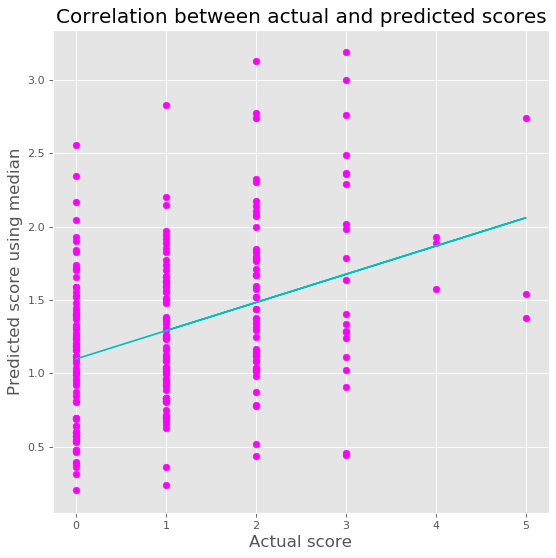

Correlation between predicted and actual scores using median: 0.3697


In [253]:
X = model_data_med_predictions.goals
y = model_data_med_predictions.predictions

%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X, y, c = "magenta")

# solution
a, b = best_fit(X,y)

yfit = [a + b * x for x in X]
plt.plot(X, yfit, 'c')

plt.xlabel("Actual score",fontsize=15)
plt.ylabel("Predicted score using median",fontsize=15)
plt.title("Correlation between actual and predicted scores", fontsize=18)
plt.show()

#get correlation value
print("Correlation between predicted and actual scores using median:", "{0:.4f}".format(np.corrcoef(X,y)[0][1]))

## Using Mode

# Predicting scores using historical data

In [245]:
#create model
model_data_hist = pd.concat([df_bet[['home_team','away_team', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'score.home': 'goals'}),
           df_bet[['away_team','home_team', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'score.away': 'goals'})])

In [248]:
poisson_model_hist = smf.glm(formula="goals ~ home + team + opponent", data=model_data_hist[:532], 
                        family=sm.families.Poisson()).fit()
poisson_model_hist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  532
Model:                            GLM   Df Residuals:                      492
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -762.67
Date:                Mon, 29 Jul 2019   Deviance:                       518.11
Time:                        15:53:23   Pearson chi2:                     436.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.6180      0.212      2.908      0.004       0.202       1.035
team[T.Arsenal]                         0.3764      0.204      1.842      0.065      -0.024       0.777
team[T.Brighton & Hove Albion]         -0.4869      0.260     -1.870      0.062      -0.997       0.024
team[T.Burnley]                        -0.0464      0.225     -0.206      0.837      -0.488       0.395
team[T.Cardiff City]                   -0.4004      0.250     -1.600      0.110      -0.891       0.090
team[T.Chelsea]                         0.1266      0.211      0.599      0.549      -0.288       0.541
team[T.Crystal Palace]                 -0.2052      0.232     -0.886      0.376      -0.659       0.249
team[T.Everton]                         0.0848      0.219      0.387      0.699      -0.345       0.515
team[T.Fulham]                         -0.2889      0.254     -1.138      0.255      -0.786       0.209
team[T.Huddersfield Town]              -0.9774      0.301     -3.243      0.001      -1.568      -0.387
team[T.Leicester City]                 -0.1105      0.231     -0.478      0.633      -0.564       0.343
team[T.Liverpool]                       0.5324      0.196      2.711      0.007       0.148       0.917
team[T.Manchester City]                 0.5902      0.197      3.003      0.003       0.205       0.975
team[T.Manchester United]               0.0671      0.227      0.296      0.767      -0.378       0.512
team[T.Newcastle United]               -0.2726      0.242     -1.125      0.261      -0.748       0.202
team[T.Southampton]                    -0.0141      0.227     -0.062      0.950      -0.458       0.430
team[T.Tottenham Hotspur]               0.3011      0.204      1.474      0.141      -0.099       0.702
team[T.Watford]                         0.0240      0.213      0.113      0.910      -0.394       0.442
team[T.West Ham United]                 0.1442      0.217      0.666      0.506      -0.280       0.569
team[T.Wolverhampton Wanderers]        -0.1135      0.236     -0.482      0.630      -0.575       0.348
opponent[T.Arsenal]                    -0.3413      0.204     -1.673      0.094      -0.741       0.058
opponent[T.Brighton & Hove Albion]     -0.3956      0.203     -1.952      0.051      -0.793       0.002
opponent[T.Burnley]                    -0.1379      0.194     -0.712      0.476      -0.517       0.241
opponent[T.Cardiff City]               -0.1674      0.200     -0.836      0.403      -0.560       0.225
opponent[T.Chelsea]                    -0.5751      0.220     -2.609      0.009      -1.007      -0.143
opponent[T.Crystal Palace]             -0.3656      0.211     -1.734      0.083      -0.779       0.048
opponent[T.Everton]                    -0.3215      0.204     -1.57

In [249]:
predictions = poisson_model_hist.predict(model_data_hist[532:][['home', 'team', 'opponent']])

#create a dataframe storing actual score and predictions
model_data_predictions_hist = model_data_hist[532:].copy()
model_data_predictions_hist.reset_index(inplace = True)
model_data_predictions_hist.drop("index", axis = 1, inplace = True)
predictions = pd.Series(predictions)
predictions.reset_index(inplace = True, drop = True)
model_data_predictions_hist["predictions"] = predictions

best fit line:
y = 1.09 + 0.20x


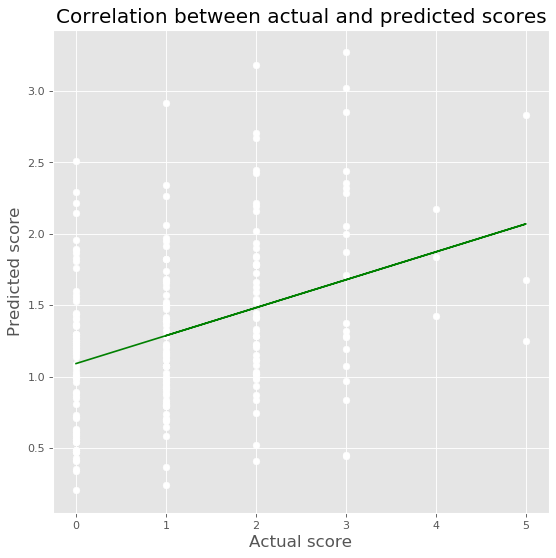

Correlation between predicted and actual scores using historical data: 0.3696


In [255]:
X = model_data_predictions_hist.goals
y = model_data_predictions_hist.predictions

%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X, y, c = "white")

# solution
a, b = best_fit(X,y)

yfit = [a + b * x for x in X]
plt.plot(X, yfit, 'g')

plt.xlabel("Actual score",fontsize=15)
plt.ylabel("Predicted score",fontsize=15)
plt.title("Correlation between actual and predicted scores", fontsize=18)
plt.show()

#get correlation value
print("Correlation between predicted and actual scores using historical data:", "{0:.4f}".format(np.corrcoef(X,y)[0][1]))

# Evaluating outcome predictions

In [258]:
#simulate matches with my models
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [ ]:
# using median
# create new columns for predictions 
df

In [259]:
model_data_median.head()

,team,opponent,median_bet,goals,home
0,Everton,Wolverhampton Wanderers,0,1.0,1
1,West Ham United,Chelsea,0,0.0,1
2,Tottenham Hotspur,West Ham United,3,0.0,1
3,Watford,AFC Bournemouth,2,0.0,1
4,Leicester City,Watford,2,2.0,1


In [274]:
df_bet[(df_bet["home_team"] == "Fulham") & (df_bet["away_team"] == "Southampton")][["score.home", "score.away"]]

,score.home,score.away
307,3.0,2.0
